In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import (
    LabelEncoder,
    OneHotEncoder,
    OrdinalEncoder,
    PowerTransformer,
    StandardScaler,
)

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Clicked Ads Dataset.csv', index_col=0)
pd.set_option('display.max_columns', None)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [3]:
df.shape

(1000, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 85.9+ KB


In [5]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  987 non-null    float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               987 non-null    float64       
 3   Daily Internet Usage      989 non-null    float64       
 4   Male                      997 non-null    object        
 5   Timestamp                 1000 non-null   datetime64[ns]
 6   Clicked on Ad             1000 non-null   object        
 7   city                      1000 non-null   object        
 8   province                  1000 non-null   object        
 9   category                  1000 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 85.9+ KB


In [7]:
df.nunique()

Daily Time Spent on Site    890
Age                          43
Area Income                 987
Daily Internet Usage        955
Male                          2
Timestamp                   997
Clicked on Ad                 2
city                         30
province                     16
category                     10
dtype: int64

In [8]:
num = df.select_dtypes(exclude='object')
cat = df.drop(columns=num.columns)

In [9]:
num.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,987.000000,1000.000000,9.870000e+02,989.000000
mean,64.929524,36.009000,3.848647e+08,179.863620
std,15.844699,8.785562,9.407999e+07,43.870142
min,32.600000,19.000000,9.797550e+07,104.780000
25%,51.270000,29.000000,3.286330e+08,138.710000
50%,68.110000,35.000000,3.990683e+08,182.650000
75%,78.460000,42.000000,4.583554e+08,218.790000
max,91.430000,61.000000,5.563936e+08,267.010000


In [10]:
df.isnull().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [11]:
cat.describe()

,Male,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000
unique,2,2,30,16,10
top,Perempuan,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,500,64,253,112


## Exploratory Data Analysis

In [12]:
df['Clicked on Ad'].value_counts()

No     500
Yes    500
Name: Clicked on Ad, dtype: int64

In [13]:
dfg = df.groupby(['Age','Clicked on Ad']).aggregate({'Daily Time Spent on Site':'count'}).rename(columns={'Daily Time Spent on Site': 'Jumlah'}).reset_index()
dfg1 = df.groupby(['Age']).aggregate({'Daily Time Spent on Site':'count'}).rename(columns={'Daily Time Spent on Site': 'Total'}).reset_index()
dfg = pd.merge(dfg, dfg1, on='Age', how='outer')
dfg['Ratio'] = dfg['Jumlah'] / dfg['Total'] * 100

In [14]:
dfg.head(10)

,Age,Clicked on Ad,Jumlah,Total,Ratio
0,19,No,5,6,83.333333
1,19,Yes,1,6,16.666667
2,20,No,5,6,83.333333
3,20,Yes,1,6,16.666667
4,21,No,6,6,100.000000
5,22,No,12,13,92.307692
6,22,Yes,1,13,7.692308
7,23,No,11,19,57.894737
8,23,Yes,8,19,42.105263
9,24,No,15,21,71.428571


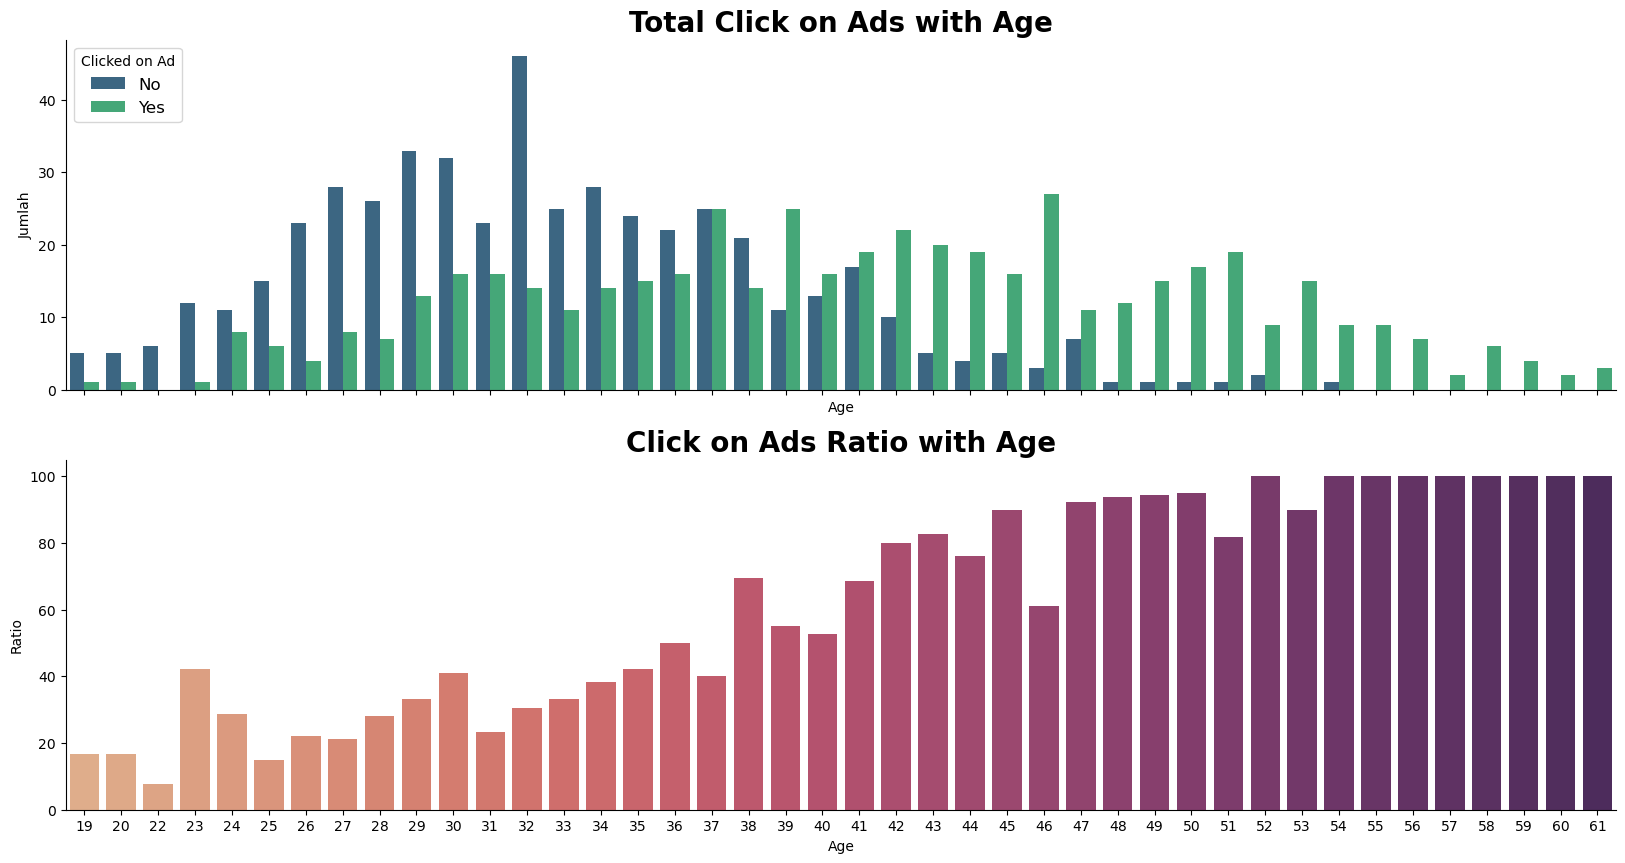

In [15]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize =(20,10), sharex=True)
sns.barplot(x = 'Age', y = 'Jumlah', data = dfg, hue = 'Clicked on Ad', palette='viridis', ax = ax1)
sns.barplot(y='Ratio', x='Age', data=dfg[dfg['Clicked on Ad'] == 'Yes'], palette='flare', ax=ax2)

ax1.set_title('Total Click on Ads with Age', weight = 'bold', size = 20)
ax1.legend(title='Clicked on Ad', fontsize=12, loc='upper left')
ax2.set_title('Click on Ads Ratio with Age', weight = 'bold', size = 20)

sns.despine()
plt.show()

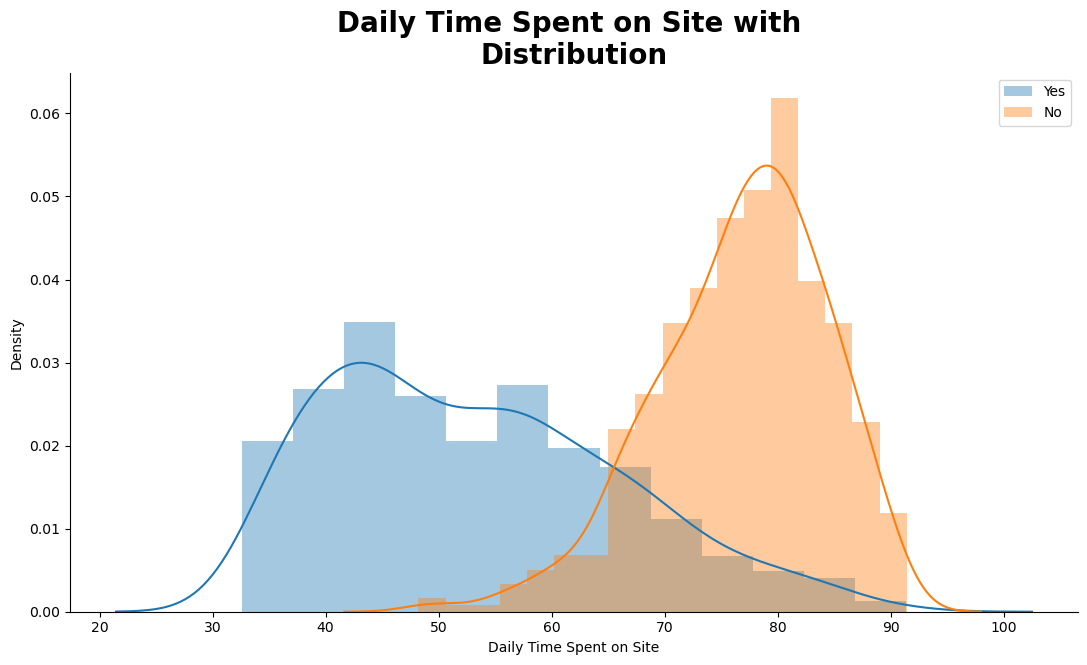

In [16]:
yes = df[df['Clicked on Ad'] == 'Yes']
no = df[df['Clicked on Ad'] == 'No']

plt.figure(figsize=(13,7))
sns.distplot(yes['Daily Time Spent on Site'], label= 'Yes')
sns.distplot(no['Daily Time Spent on Site'], label='No')
plt.legend()
plt.title('Daily Time Spent on Site with \nDistribution', weight='bold', size = 20)
sns.despine()
plt.show()

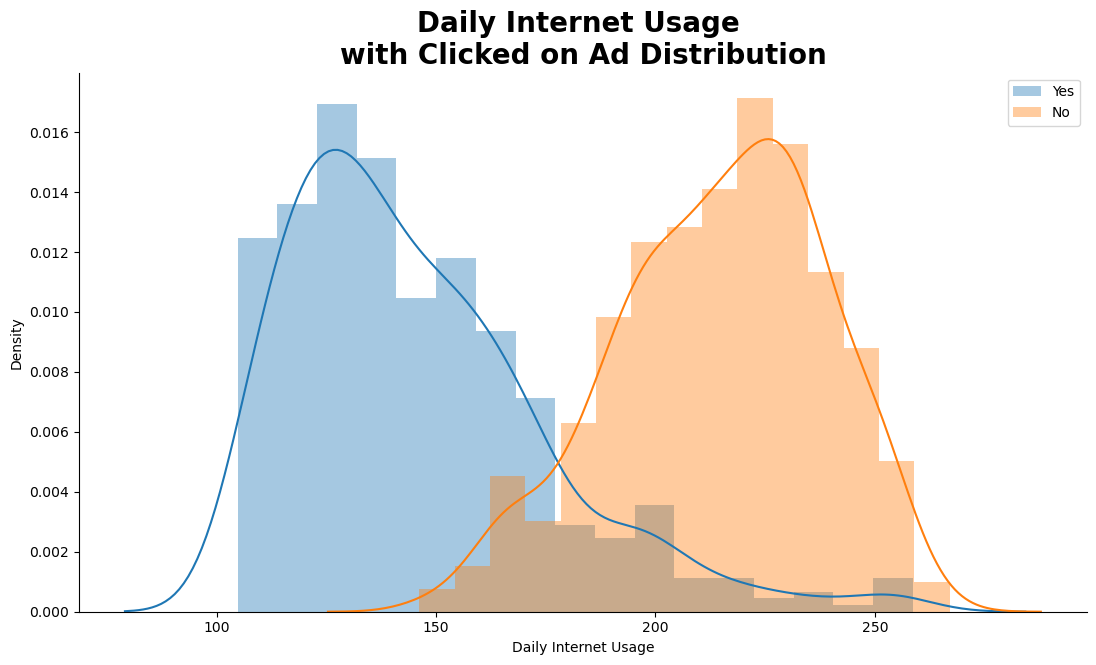

In [17]:
plt.figure(figsize=(13,7))
sns.distplot(yes['Daily Internet Usage'], label= 'Yes')
sns.distplot(no['Daily Internet Usage'], label='No')
plt.legend()
plt.title('Daily Internet Usage \nwith Clicked on Ad Distribution', weight='bold', size = 20)
sns.despine()
plt.show()

## Multivariate Analysis

In [18]:
from sklearn.preprocessing import LabelEncoder

def calculate_correlation(dataframe):
    # Mengubah kolom-kolom non-numerik menjadi representasi numerik
    label_encoder = LabelEncoder()
    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            dataframe[column] = label_encoder.fit_transform(dataframe[column])

    correlation_matrix = dataframe.corr()
    return sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm')

<Axes: >

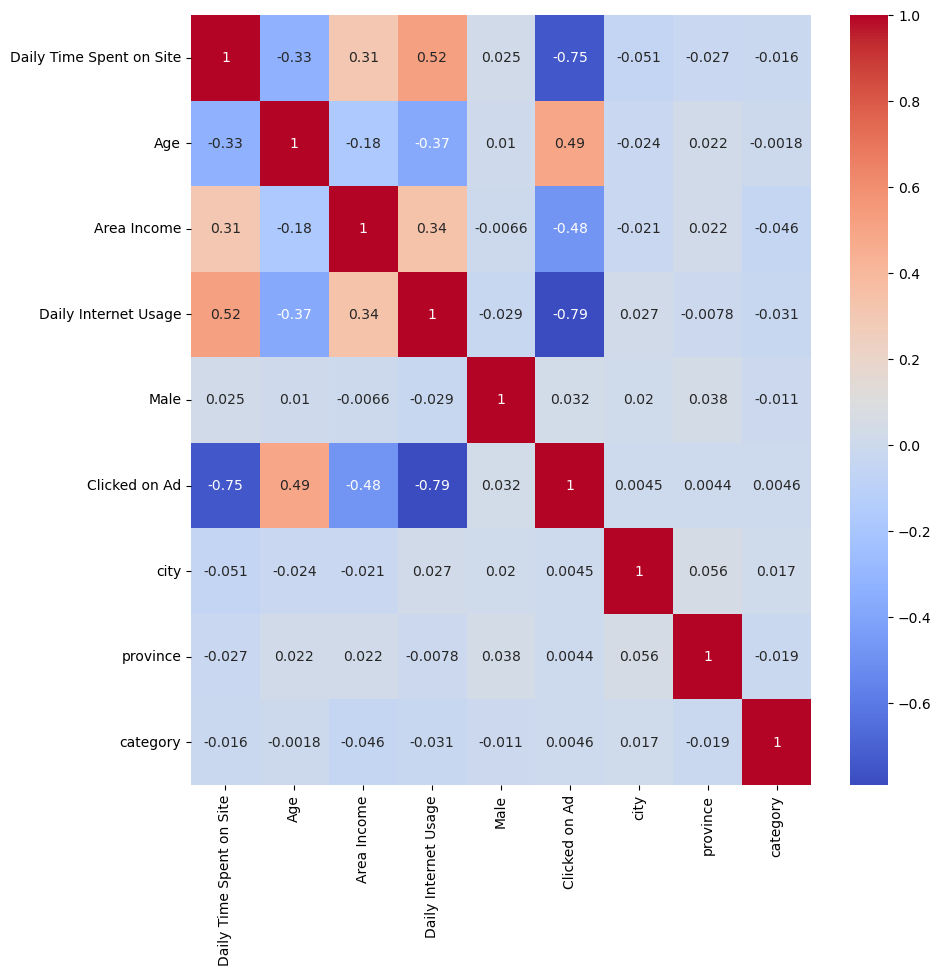

In [19]:
plt.figure(figsize=(10,10))
df_cor = df.copy()
calculate_correlation(df_cor)

## Preprocessing

In [20]:
df.isna().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [21]:
# Define the columns to fill missing values
fill_cols = ['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage']

# Fill missing values with the corresponding mean for each 'Clicked on Ad' category
for col in fill_cols:
    df[col] = df[col].fillna(df.groupby('Clicked on Ad')[col].transform('mean'))

# Fill missing values in 'Male' column with the mode
df['Male'] = df['Male'].fillna(df['Male'].mode()[0])

# Rename the column to 'Gender'
df.rename(columns={'Male': 'Gender'}, inplace=True)


In [22]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Gender                      0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

In [23]:
le = LabelEncoder()

for i in ['Gender','city','Clicked on Ad','province','category'] :
    df[i] = le.fit_transform(df[i])

In [24]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,1,2016-03-27 00:53:00,0,13,2,5
1,80.23,31,479092950.0,193.77,0,2016-04-04 01:39:00,0,8,0,4
2,69.47,26,418501580.0,236.50,1,2016-03-13 20:35:00,0,25,5,1
3,74.15,29,383643260.0,245.89,0,2016-01-10 02:31:00,0,4,9,7
4,68.37,35,517229930.0,225.58,1,2016-06-03 03:36:00,0,17,15,3


In [25]:
df['Tahun'] = df['Timestamp'].dt.year
df['Bulan'] = df['Timestamp'].dt.month
df['Tanggal'] = df['Timestamp'].dt.day
df['Pekan'] = df['Timestamp'].dt.isocalendar().week
df['Pekan'] = df['Pekan'].astype(int)

df.drop(columns=['Timestamp'], inplace=True)

In [26]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad,city,province,category,Tahun,Bulan,Tanggal,Pekan
0,68.95,35,432837300.0,256.09,1,0,13,2,5,2016,3,27,12
1,80.23,31,479092950.0,193.77,0,0,8,0,4,2016,4,4,14
2,69.47,26,418501580.0,236.50,1,0,25,5,1,2016,3,13,10
3,74.15,29,383643260.0,245.89,0,0,4,9,7,2016,1,10,1
4,68.37,35,517229930.0,225.58,1,0,17,15,3,2016,6,3,22


### Seperate target variabel from feature for scalling

In [27]:
# Seperate target variabel from feature for scalling
X = df.drop("Clicked on Ad", axis=1)
y = df['Clicked on Ad']  # drop column 'Clicked on Ad' from X as Target

In [28]:
X.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,city,province,category,Tahun,Bulan,Tanggal,Pekan
0,68.95,35,432837300.0,256.09,1,13,2,5,2016,3,27,12
1,80.23,31,479092950.0,193.77,0,8,0,4,2016,4,4,14
2,69.47,26,418501580.0,236.50,1,25,5,1,2016,3,13,10
3,74.15,29,383643260.0,245.89,0,4,9,7,2016,1,10,1
4,68.37,35,517229930.0,225.58,1,17,15,3,2016,6,3,22


In [29]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Clicked on Ad, dtype: int32

## Modeling

In [30]:
import shap
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import (
    accuracy_score,
    auc,
    classification_report,
    confusion_matrix,
    f1_score,
    fbeta_score,
    make_scorer,
    precision_recall_curve,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split
from sklearn.svm import SVC
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier

## Splitting Data

In [31]:
# Split Data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Show train and test data 
print("Number of rows and columns of training data:", X_train.shape)
print("Number of rows and columns of test data:", X_test.shape)

Number of rows and columns of training data: (800, 12)
Number of rows and columns of test data: (200, 12)


### Using Normalization

In [32]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
minmax = MinMaxScaler()

# Scale the training data
X_train_norm = minmax.fit_transform(X_train)

# Scale the test data using the same scaler
X_test_norm = minmax.transform(X_test)


In [33]:
#model initialization
models = [
    ["Logistic Regression", LogisticRegression(random_state=42)],
    ["Decision Tree", DecisionTreeClassifier(random_state=42)],
    ["Random Forest", RandomForestClassifier(random_state=42)],
    ["XGBClassifier", XGBClassifier(random_state=42)],
]

### Model Without Normalization

In [34]:
# list kosong untuk menyimpan hasil evaluasi masing-masing model
results = []

# loop untuk masing-masing model
for model_name, model in models:
    # fit model dengan data train
    model.fit(X_train, y_train)

    # predict dengan data train
    y_train_pred = model.predict(X_train)
    y_train_prob = model.predict_proba(X_train)[:, 1]

    # predict dengan data test
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]

    # evaluasi model dengan data train
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_roc_auc = roc_auc_score(y_train, y_train_prob)

    # evaluasi model dengan data test
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_prob)

    # tambahkan hasil evaluasi ke dalam list results
    results.append(
        {
            "Model": model_name,
            "Train Accuracy": train_accuracy,
            "Test Accuracy": test_accuracy,
            "Train Precision": train_precision,
            "Test Precision": test_precision,
            "Train Recall": train_recall,
            "Test Recall": test_recall,
            "Train F1 Score": train_f1,
            "Test F1 Score": test_f1,
            "Train ROC AUC Score": train_roc_auc,
            "Test ROC AUC Score": test_roc_auc,
        }
    )

# gabungkan hasil evaluasi masing-masing model menjadi satu tabel
metrics_eval = pd.DataFrame(results)
metrics_eval.set_index("Model", inplace=True)
display(metrics_eval)

,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score,Train ROC AUC Score,Test ROC AUC Score
Model,,,,,,,,,,
Logistic Regression,0.5,0.500,0.0,0.000000,0.0,0.00,0.0,0.000000,0.763331,0.8121
Decision Tree,1.0,0.945,1.0,0.949495,1.0,0.94,1.0,0.944724,1.000000,0.9450
Random Forest,1.0,0.965,1.0,0.960396,1.0,0.97,1.0,0.965174,1.000000,0.9889
XGBClassifier,1.0,0.965,1.0,0.969697,1.0,0.96,1.0,0.964824,1.000000,0.9864


### Model With Normalization

In [35]:
results = []

# Loop through each model
for model_name, model in models:
    # Fit the model with the scaled training data
    model.fit(X_train_norm, y_train)

    # Predict using the scaled training data
    y_train_pred = model.predict(X_train_norm)
    y_train_prob = model.predict_proba(X_train_norm)[:, 1]

    # Predict using the scaled test data
    y_test_pred = model.predict(X_test_norm)
    y_test_prob = model.predict_proba(X_test_norm)[:, 1]

    # Evaluate the model with the scaled training data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_roc_auc = roc_auc_score(y_train, y_train_prob)

    # Evaluate the model with the scaled test data
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_prob)

    # Add evaluation results to the results list
    results.append(
        {
            "Model": model_name,
            "Train Accuracy": train_accuracy,
            "Test Accuracy": test_accuracy,
            "Train Precision": train_precision,
            "Test Precision": test_precision,
            "Train Recall": train_recall,
            "Test Recall": test_recall,
            "Train F1 Score": train_f1,
            "Test F1 Score": test_f1,
            "Train ROC AUC Score": train_roc_auc,
            "Test ROC AUC Score": test_roc_auc,
        }
    )

# Combine the evaluation results of each model into a single table
metrics_eval = pd.DataFrame(results)
metrics_eval.set_index("Model", inplace=True)
display(metrics_eval)


,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score,Train ROC AUC Score,Test ROC AUC Score
Model,,,,,,,,,,
Logistic Regression,0.965,0.975,0.981865,0.989691,0.9475,0.96,0.964377,0.974619,0.990794,0.9909
Decision Tree,1.000,0.940,1.000000,0.940000,1.0000,0.94,1.000000,0.940000,1.000000,0.9400
Random Forest,1.000,0.965,1.000000,0.960396,1.0000,0.97,1.000000,0.965174,1.000000,0.9888
XGBClassifier,1.000,0.965,1.000000,0.969697,1.0000,0.96,1.000000,0.964824,1.000000,0.9864


### Cross Validation Model

### CV Model Without Normalization

In [36]:
 # list kosong untuk menyimpan hasil evaluasi masing-masing model
results_cv = []

# scoring yang akan digunakan untuk evaluasi
scoring = ["recall", "precision", "f1", "roc_auc"]

# cross-validation
for model in models:
    model_name = model[0]
    clf = model[1]
    cv_scores = cross_validate(
        clf, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True
    )

    cv_recall_mean = abs(cv_scores["test_recall"]).mean()
    cv_recall_std = abs(cv_scores["test_recall"]).std()
    training_recall = abs(cv_scores["train_recall"]).mean()

    cv_precision_mean = abs(cv_scores["test_precision"]).mean()
    cv_precision_std = abs(cv_scores["test_precision"]).std()
    training_precision = abs(cv_scores["train_precision"]).mean()

    cv_f1_mean = abs(cv_scores["test_f1"]).mean()
    cv_f1_std = abs(cv_scores["test_f1"]).std()
    training_f1 = abs(cv_scores["train_f1"]).mean()

    cv_roc_auc_mean = abs(cv_scores["test_roc_auc"]).mean()
    cv_roc_auc_std = abs(cv_scores["test_roc_auc"]).std()
    training_roc_auc = abs(cv_scores["train_roc_auc"]).mean()

    results_cv.append(
        [
            model_name,
            training_recall,
            cv_recall_mean,
            cv_recall_std,
            training_precision,
            cv_precision_mean,
            cv_precision_std,
            training_f1,
            cv_f1_mean,
            cv_f1_std,
            training_roc_auc,
            cv_roc_auc_mean,
            cv_roc_auc_std,
        ]
    )

# buat DataFrame untuk menampung hasil evaluasi
df_results_cv = pd.DataFrame(
    results_cv,
    columns=[
        "Model",
        "Training Recall",
        "CV Recall (mean)",
        "CV Recall (std)",
        "Training Precision",
        "CV Precision (mean)",
        "CV Precision (std)",
        "Training F1",
        "CV F1 (mean)",
        "CV F1 (std)",
        "Training AUC_ROC",
        "CV AUC_ROC (mean)",
        "CV AUC_ROC (std)",
    ],
)

In [37]:
df_results_cv

,Model,Training Recall,CV Recall (mean),CV Recall (std),Training Precision,CV Precision (mean),CV Precision (std),Training F1,CV F1 (mean),CV F1 (std),Training AUC_ROC,CV AUC_ROC (mean),CV AUC_ROC (std)
0,Logistic Regression,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.763465,0.765469,0.026152
1,Decision Tree,1.0,0.9425,0.030208,1.0,0.942073,0.031408,1.0,0.941335,0.008196,1.000000,0.941250,0.008478
2,Random Forest,1.0,0.9525,0.027839,1.0,0.964687,0.008927,1.0,0.958302,0.014273,1.000000,0.990422,0.005386
3,XGBClassifier,1.0,0.9550,0.015000,1.0,0.967562,0.015892,1.0,0.961012,0.004612,1.000000,0.990812,0.004327


### CV Model With Normalization

In [38]:
# list kosong untuk menyimpan hasil evaluasi masing-masing model
results_cv = []

# scoring yang akan digunakan untuk evaluasi
scoring = ["recall", "precision", "f1", "roc_auc"]

# cross-validation
for model in models:
    model_name = model[0]
    clf = model[1]
    cv_scores = cross_validate(
        clf, X_train_norm, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True
    )

    cv_recall_mean = abs(cv_scores["test_recall"]).mean()
    cv_recall_std = abs(cv_scores["test_recall"]).std()
    training_recall = abs(cv_scores["train_recall"]).mean()

    cv_precision_mean = abs(cv_scores["test_precision"]).mean()
    cv_precision_std = abs(cv_scores["test_precision"]).std()
    training_precision = abs(cv_scores["train_precision"]).mean()

    cv_f1_mean = abs(cv_scores["test_f1"]).mean()
    cv_f1_std = abs(cv_scores["test_f1"]).std()
    training_f1 = abs(cv_scores["train_f1"]).mean()

    cv_roc_auc_mean = abs(cv_scores["test_roc_auc"]).mean()
    cv_roc_auc_std = abs(cv_scores["test_roc_auc"]).std()
    training_roc_auc = abs(cv_scores["train_roc_auc"]).mean()

    results_cv.append(
        [
            model_name,
            training_recall,
            cv_recall_mean,
            cv_recall_std,
            training_precision,
            cv_precision_mean,
            cv_precision_std,
            training_f1,
            cv_f1_mean,
            cv_f1_std,
            training_roc_auc,
            cv_roc_auc_mean,
            cv_roc_auc_std,
        ]
    )

# buat DataFrame untuk menampung hasil evaluasi
df_results_cv_norm = pd.DataFrame(
    results_cv,
    columns=[
        "Model",
        "Training Recall",
        "CV Recall (mean)",
        "CV Recall (std)",
        "Training Precision",
        "CV Precision (mean)",
        "CV Precision (std)",
        "Training F1",
        "CV F1 (mean)",
        "CV F1 (std)",
        "Training AUC_ROC",
        "CV AUC_ROC (mean)",
        "CV AUC_ROC (std)",
    ],
)


In [39]:
df_results_cv_norm

,Model,Training Recall,CV Recall (mean),CV Recall (std),Training Precision,CV Precision (mean),CV Precision (std),Training F1,CV F1 (mean),CV F1 (std),Training AUC_ROC,CV AUC_ROC (mean),CV AUC_ROC (std)
0,Logistic Regression,0.946875,0.9425,0.025739,0.986337,0.981736,0.006482,0.966181,0.961565,0.015060,0.990959,0.988625,0.005132
1,Decision Tree,1.000000,0.9425,0.030208,1.000000,0.948701,0.026123,1.000000,0.944792,0.007723,1.000000,0.945000,0.007289
2,Random Forest,1.000000,0.9550,0.023184,1.000000,0.964759,0.008995,1.000000,0.959676,0.012141,1.000000,0.990375,0.005352
3,XGBClassifier,1.000000,0.9525,0.014577,1.000000,0.967467,0.015924,1.000000,0.959707,0.004919,1.000000,0.990719,0.004298


### Hyperparameter Tuning Without Normalization

In [40]:
# inisialisasi model
models = [
    {
        "model": XGBClassifier(),
        "params": {
            'max_depth': [7],
            'learning_rate': [0.1],
            'n_estimators': [300]
        },
    }
]


# list kosong untuk menyimpan hasil evaluasi masing-masing model
results_tuned = []

# loop untuk masing-masing model
for model in models:
    # inisialisasi GridSearchCV dengan model dan hyperparameters yang telah ditentukan
    gs = GridSearchCV(model["model"], model["params"], cv=5, scoring="recall")

    # fit model dengan data train
    gs.fit(X_train, y_train)

    # mengambil nilai hyperparameter terbaik dari hasil GridSearchCV
    best_params = gs.best_params_

    # predict dengan data test
    y_test_pred = gs.predict(X_test)
    y_test_prob = gs.predict_proba(X_test)[:, 1]

    # evaluasi model dengan data test setelah hyperparameter tuning
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_prob)

    # evaluasi model dengan cross-validation
    cv_results = cross_validate(
        model["model"].set_params(**best_params),
        X_train,
        y_train,
        cv=5,
        scoring=["precision", "recall", "f1", "roc_auc"],
        return_train_score=True,
    )

    cv_recall_mean = abs(cv_results["test_recall"]).mean()
    cv_recall_std = abs(cv_results["test_recall"]).std()
    training_recall = abs(cv_results["train_recall"]).mean()
    cv_precision_mean = abs(cv_results["test_precision"]).mean()
    cv_precision_std = abs(cv_results["test_precision"]).std()
    training_precision = abs(cv_results["train_precision"]).mean()
    cv_f1_mean = abs(cv_results["test_f1"]).mean()
    cv_f1_std = abs(cv_results["test_f1"]).std()
    training_f1 = abs(cv_results["train_f1"]).mean()
    cv_roc_auc_mean = abs(cv_results["test_roc_auc"]).mean()
    cv_roc_auc_std = abs(cv_results["test_roc_auc"]).std()
    training_roc_auc = abs(cv_results["train_roc_auc"]).mean()

    # menyimpan hasil evaluasi dalam dictionary
    results_tuned.append(
        {
            "model": model["model"].__class__.__name__,
            "best_params": best_params,
            "Training Recall": training_recall,
            "CV Recall (mean)": cv_recall_mean,
            "CV Recall (std)": cv_recall_std,
            "Training Precision": training_precision,
            "CV Precision (mean)": cv_precision_mean,
            "CV Precision (std)": cv_precision_std,
            "Training F1": training_f1,
            "CV F1 (mean)": cv_f1_mean,
            "CV F1 (std)": cv_f1_std,
            "Training AUC_ROC": training_roc_auc,
            "CV AUC_ROC (mean)": cv_roc_auc_mean,
            "CV AUC_ROC (std)": cv_roc_auc_std,
        }
    )

# tampilkan hasil evaluasi untuk masing-masing model
df_results_tuned = pd.DataFrame(results_tuned)

df_results_tuned


,model,best_params,Training Recall,CV Recall (mean),CV Recall (std),Training Precision,CV Precision (mean),CV Precision (std),Training F1,CV F1 (mean),CV F1 (std),Training AUC_ROC,CV AUC_ROC (mean),CV AUC_ROC (std)
0,XGBClassifier,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",1.0,0.9575,0.012748,1.0,0.970013,0.017995,1.0,0.963563,0.009837,1.0,0.991375,0.004505


In [41]:
# inisialisasi model
models = [
    {
        "model": XGBClassifier(),
        "params": {
            'max_depth': [7],
            'learning_rate': [0.1],
            'n_estimators': [300]
        },
    }
]

# list kosong untuk menyimpan hasil evaluasi masing-masing model
results_tuned = []

# loop untuk masing-masing model
for model in models:
    # inisialisasi GridSearchCV dengan model dan hyperparameters yang telah ditentukan
    gs = GridSearchCV(model["model"], model["params"], cv=5, scoring="recall")

    # fit model dengan data train
    gs.fit(X_train_norm, y_train)  # Gunakan X_train_norm untuk melatih model

    # mengambil nilai hyperparameter terbaik dari hasil GridSearchCV
    best_params = gs.best_params_

    # predict dengan data test
    y_test_pred = gs.predict(X_test_norm)  # Gunakan X_test_norm untuk melakukan prediksi
    y_test_prob = gs.predict_proba(X_test_norm)[:, 1]  # Gunakan X_test_norm untuk prediksi probabilitas

    # evaluasi model dengan data test setelah hyperparameter tuning
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_prob)

    # evaluasi model dengan cross-validation
    cv_results = cross_validate(
        model["model"].set_params(**best_params),
        X_train_norm,  # Gunakan X_train_norm untuk cross-validation
        y_train,
        cv=5,
        scoring=["precision", "recall", "f1", "roc_auc"],
        return_train_score=True,
    )

    cv_recall_mean = abs(cv_results["test_recall"]).mean()
    cv_recall_std = abs(cv_results["test_recall"]).std()
    training_recall = abs(cv_results["train_recall"]).mean()
    cv_precision_mean = abs(cv_results["test_precision"]).mean()
    cv_precision_std = abs(cv_results["test_precision"]).std()
    training_precision = abs(cv_results["train_precision"]).mean()
    cv_f1_mean = abs(cv_results["test_f1"]).mean()
    cv_f1_std = abs(cv_results["test_f1"]).std()
    training_f1 = abs(cv_results["train_f1"]).mean()
    cv_roc_auc_mean = abs(cv_results["test_roc_auc"]).mean()
    cv_roc_auc_std = abs(cv_results["test_roc_auc"]).std()
    training_roc_auc = abs(cv_results["train_roc_auc"]).mean()

    # menyimpan hasil evaluasi dalam dictionary
    results_tuned.append(
        {
            "model": model["model"].__class__.__name__,
            "best_params": best_params,
            "Training Recall": training_recall,
            "CV Recall (mean)": cv_recall_mean,
            "CV Recall (std)": cv_recall_std,
            "Training Precision": training_precision,
            "CV Precision (mean)": cv_precision_mean,
            "CV Precision (std)": cv_precision_std,
            "Training F1": training_f1,
            "CV F1 (mean)": cv_f1_mean,
            "CV F1 (std)": cv_f1_std,
            "Training AUC_ROC": training_roc_auc,
            "CV AUC_ROC (mean)": cv_roc_auc_mean,
            "CV AUC_ROC (std)": cv_roc_auc_std,
        }
    )

# tampilkan hasil evaluasi untuk masing-masing model
df_results_tuned_norm = pd.DataFrame(results_tuned)

df_results_tuned_norm

,model,best_params,Training Recall,CV Recall (mean),CV Recall (std),Training Precision,CV Precision (mean),CV Precision (std),Training F1,CV F1 (mean),CV F1 (std),Training AUC_ROC,CV AUC_ROC (mean),CV AUC_ROC (std)
0,XGBClassifier,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",1.0,0.9575,0.012748,1.0,0.970013,0.017995,1.0,0.963563,0.009837,1.0,0.991313,0.004495


In [52]:
def show_feature_importance(model, feature_names):
    feat_importances = pd.Series(model.feature_importances_, index=feature_names)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance Score')

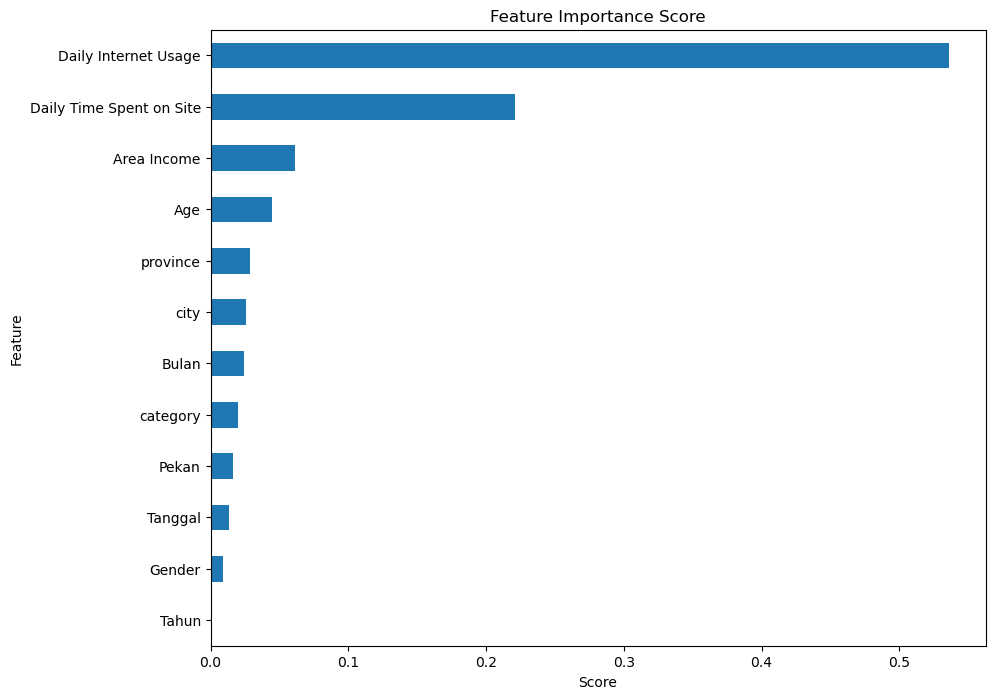

In [54]:
# Ambil model XGBClassifier yang sudah dioptimasi
xgb_tuned_model = XGBClassifier(**df_results_tuned.loc[0, "best_params"])

# Fit model dengan data train
xgb_tuned_model.fit(X_train, y_train)

# Prediksi dengan data test
y_test_pred = xgb_tuned_model.predict(X_test)
y_test_prob = xgb_tuned_model.predict_proba(X_test)[:, 1]

# Show feature importance for the tuned XGBClassifier
show_feature_importance(xgb_tuned_model, X_train.columns)


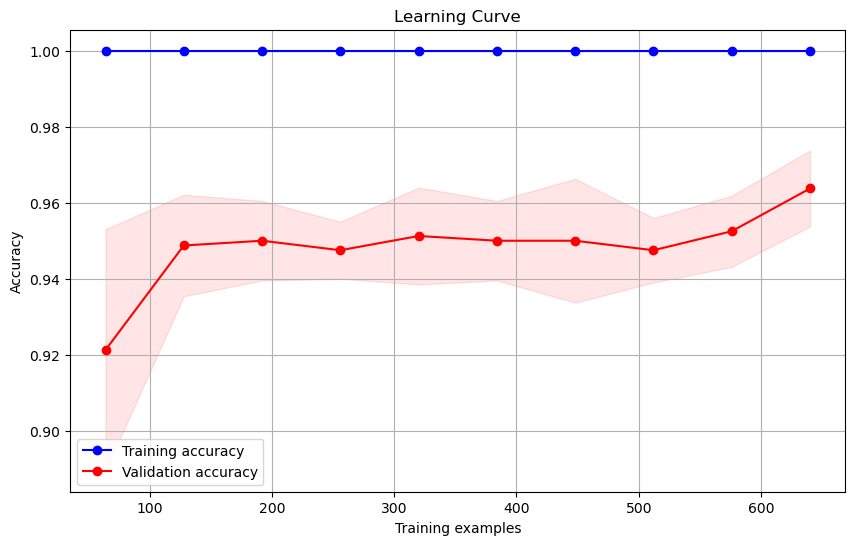

In [55]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.title('Learning Curve')
    plt.xlabel('Training examples')
    plt.ylabel('Accuracy')
    plt.grid()
    
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='b')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='r')
    plt.plot(train_sizes, train_mean, 'o-', color='b', label='Training accuracy')
    plt.plot(train_sizes, test_mean, 'o-', color='r', label='Validation accuracy')
    
    plt.legend(loc='best')
    plt.show()

plot_learning_curve(xgb_tuned_model, X_train, y_train)

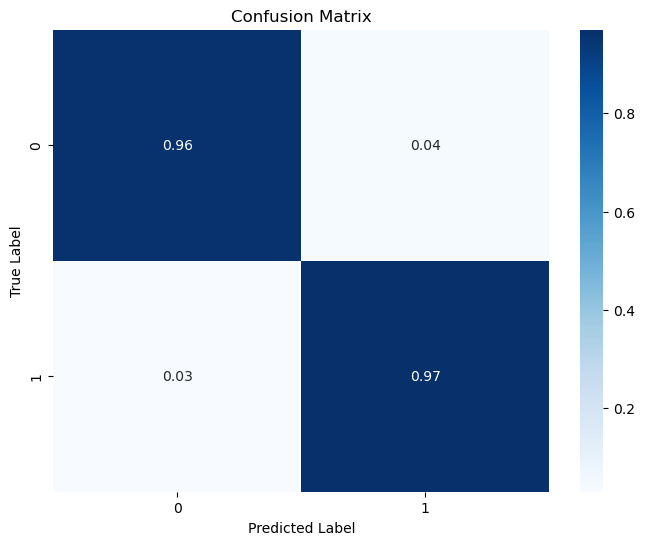

In [56]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalisasi
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
y_pred = xgb_tuned_model.predict(X_test)

plot_confusion_matrix(y_test, y_pred, ['0', '1'])